Counterfactual data augmentation module from CLAIRE.

Implemention at `src/claire_cf_data_augmentation.py`.

In [1]:
%reload_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

# Adult dataset (sensitive attribute: "sex")

In [3]:
from src.datasets import IncomeDataset
from torch.utils.data import DataLoader

In [4]:
IncomeDataset.PATHS.keys()

dict_keys(['train_basis', 'train_betahats', 'test', 'validate'])

In [5]:
train_df = pd.read_csv(IncomeDataset.PATHS["train_betahats"])
train_df.head()

,age,education_num,sex,income,loan_approved
0,82,9,0,0,1
1,53,9,0,0,0
2,24,13,0,0,1
3,37,10,1,0,1
4,68,9,1,0,0


In [6]:
train_df.income.value_counts()

income
0    11193
1     3459
Name: count, dtype: int64

In [7]:
train_dataset = IncomeDataset("train_betahats")

print("Input features:", train_dataset.X_names)
print("Sensitive attribute:", train_dataset.A_name)
print("Target variable:", train_dataset.Y_name)
print("Decision variable:", train_dataset.D_name)

Input features: ['education_num', 'age']
Sensitive attribute: sex
Target variable: income
Decision variable: loan_approved


In [8]:
train_dataset.X.shape, train_dataset.A.shape, train_dataset.Y.shape, train_dataset.D.shape

(torch.Size([14652, 2]),
 torch.Size([14652, 1]),
 torch.Size([14652, 1]),
 torch.Size([14652, 1]))

In [9]:
train_dataset.Y.unique()

tensor([0., 1.])

In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)

## Train the CLAIRE-M VAE

In [11]:
import torch
from src.claire_cf_data_augmentation import VAE, train

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [13]:
vae = VAE(input_dim=len(train_dataset.X_names), latent_dim=10, hidden_dim=16)
vae.to(device)

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=3, out_features=16, bias=True)
    (fc_mu): Linear(in_features=16, out_features=10, bias=True)
    (fc_var): Linear(in_features=16, out_features=10, bias=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=11, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=3, bias=True)
    (activation): LeakyReLU(negative_slope=0.01)
  )
)

In [14]:
train_df.income.value_counts()

income
0    11193
1     3459
Name: count, dtype: int64

In [15]:
vae, vae_train_loss = train(vae, train_dataloader, num_epochs=100)

  1%|          | 1/100 [00:02<03:28,  2.11s/epochs]

Epoch [1/100], Loss: 1069.2572


  2%|▏         | 2/100 [00:04<03:29,  2.13s/epochs]

Epoch [2/100], Loss: 650.4685


  3%|▎         | 3/100 [00:06<03:16,  2.03s/epochs]

Epoch [3/100], Loss: 336.7987


  4%|▍         | 4/100 [00:08<03:10,  1.99s/epochs]

Epoch [4/100], Loss: 210.2699


  5%|▌         | 5/100 [00:10<03:13,  2.04s/epochs]

Epoch [5/100], Loss: 151.4234


  6%|▌         | 6/100 [00:12<03:32,  2.26s/epochs]

Epoch [6/100], Loss: 116.1566


  7%|▋         | 7/100 [00:15<03:36,  2.33s/epochs]

Epoch [7/100], Loss: 93.0295


  8%|▊         | 8/100 [00:17<03:26,  2.24s/epochs]

Epoch [8/100], Loss: 76.8704


  9%|▉         | 9/100 [00:19<03:23,  2.24s/epochs]

Epoch [9/100], Loss: 65.5273


 10%|█         | 10/100 [00:21<03:23,  2.26s/epochs]

Epoch [10/100], Loss: 57.1854


 11%|█         | 11/100 [00:24<03:23,  2.29s/epochs]

Epoch [11/100], Loss: 50.9791


 12%|█▏        | 12/100 [00:26<03:15,  2.23s/epochs]

Epoch [12/100], Loss: 46.1619


 13%|█▎        | 13/100 [00:28<03:09,  2.18s/epochs]

Epoch [13/100], Loss: 42.1722


 14%|█▍        | 14/100 [00:31<03:32,  2.47s/epochs]

Epoch [14/100], Loss: 39.0252


 15%|█▌        | 15/100 [00:33<03:24,  2.41s/epochs]

Epoch [15/100], Loss: 36.4727


 16%|█▌        | 16/100 [00:35<03:12,  2.29s/epochs]

Epoch [16/100], Loss: 34.3927


 17%|█▋        | 17/100 [00:37<03:01,  2.19s/epochs]

Epoch [17/100], Loss: 32.6825


 18%|█▊        | 18/100 [00:39<02:54,  2.13s/epochs]

Epoch [18/100], Loss: 31.1578


 19%|█▉        | 19/100 [00:41<02:47,  2.06s/epochs]

Epoch [19/100], Loss: 29.9147


 20%|██        | 20/100 [00:43<02:41,  2.02s/epochs]

Epoch [20/100], Loss: 28.7889


 21%|██        | 21/100 [00:45<02:35,  1.96s/epochs]

Epoch [21/100], Loss: 27.6175


 22%|██▏       | 22/100 [00:47<02:29,  1.92s/epochs]

Epoch [22/100], Loss: 26.3732


 23%|██▎       | 23/100 [00:49<02:32,  1.98s/epochs]

Epoch [23/100], Loss: 25.0670


 24%|██▍       | 24/100 [00:51<02:31,  2.00s/epochs]

Epoch [24/100], Loss: 23.5949


 25%|██▌       | 25/100 [00:53<02:33,  2.04s/epochs]

Epoch [25/100], Loss: 22.1727


 26%|██▌       | 26/100 [00:55<02:33,  2.08s/epochs]

Epoch [26/100], Loss: 21.2782


 27%|██▋       | 27/100 [00:58<02:43,  2.25s/epochs]

Epoch [27/100], Loss: 20.6419


 28%|██▊       | 28/100 [01:00<02:38,  2.20s/epochs]

Epoch [28/100], Loss: 20.2202


 29%|██▉       | 29/100 [01:02<02:37,  2.22s/epochs]

Epoch [29/100], Loss: 19.9903


 30%|███       | 30/100 [01:04<02:28,  2.12s/epochs]

Epoch [30/100], Loss: 19.7560


 31%|███       | 31/100 [01:06<02:19,  2.03s/epochs]

Epoch [31/100], Loss: 19.5321


 32%|███▏      | 32/100 [01:08<02:14,  1.97s/epochs]

Epoch [32/100], Loss: 19.2821


 33%|███▎      | 33/100 [01:10<02:09,  1.93s/epochs]

Epoch [33/100], Loss: 19.0537


 34%|███▍      | 34/100 [01:11<02:05,  1.90s/epochs]

Epoch [34/100], Loss: 18.7411


 35%|███▌      | 35/100 [01:13<02:05,  1.93s/epochs]

Epoch [35/100], Loss: 18.5724


 36%|███▌      | 36/100 [01:15<02:01,  1.91s/epochs]

Epoch [36/100], Loss: 18.3417


 37%|███▋      | 37/100 [01:17<01:59,  1.89s/epochs]

Epoch [37/100], Loss: 18.0028


 38%|███▊      | 38/100 [01:19<01:57,  1.89s/epochs]

Epoch [38/100], Loss: 17.8671


 39%|███▉      | 39/100 [01:21<01:59,  1.95s/epochs]

Epoch [39/100], Loss: 17.4912


 40%|████      | 40/100 [01:23<01:56,  1.94s/epochs]

Epoch [40/100], Loss: 17.2582


 41%|████      | 41/100 [01:25<01:54,  1.94s/epochs]

Epoch [41/100], Loss: 17.0063


 42%|████▏     | 42/100 [01:27<01:59,  2.06s/epochs]

Epoch [42/100], Loss: 16.7676


 43%|████▎     | 43/100 [01:30<02:06,  2.21s/epochs]

Epoch [43/100], Loss: 16.5361


 44%|████▍     | 44/100 [01:32<01:59,  2.14s/epochs]

Epoch [44/100], Loss: 16.4514


 45%|████▌     | 45/100 [01:34<01:54,  2.09s/epochs]

Epoch [45/100], Loss: 16.1867


 46%|████▌     | 46/100 [01:36<01:50,  2.05s/epochs]

Epoch [46/100], Loss: 16.0199


 47%|████▋     | 47/100 [01:38<01:45,  1.99s/epochs]

Epoch [47/100], Loss: 15.9341


 48%|████▊     | 48/100 [01:40<01:41,  1.94s/epochs]

Epoch [48/100], Loss: 15.6496


 49%|████▉     | 49/100 [01:41<01:37,  1.92s/epochs]

Epoch [49/100], Loss: 15.3867


 50%|█████     | 50/100 [01:43<01:36,  1.92s/epochs]

Epoch [50/100], Loss: 15.2043


 51%|█████     | 51/100 [01:45<01:33,  1.90s/epochs]

Epoch [51/100], Loss: 14.9004


 52%|█████▏    | 52/100 [01:47<01:30,  1.89s/epochs]

Epoch [52/100], Loss: 14.5671


 53%|█████▎    | 53/100 [01:49<01:29,  1.91s/epochs]

Epoch [53/100], Loss: 14.3305


 54%|█████▍    | 54/100 [01:51<01:27,  1.90s/epochs]

Epoch [54/100], Loss: 14.0698


 55%|█████▌    | 55/100 [01:53<01:25,  1.90s/epochs]

Epoch [55/100], Loss: 13.7345


 56%|█████▌    | 56/100 [01:55<01:23,  1.89s/epochs]

Epoch [56/100], Loss: 13.4873


 57%|█████▋    | 57/100 [01:57<01:21,  1.89s/epochs]

Epoch [57/100], Loss: 13.2377


 58%|█████▊    | 58/100 [01:58<01:18,  1.87s/epochs]

Epoch [58/100], Loss: 12.9047


 59%|█████▉    | 59/100 [02:00<01:19,  1.94s/epochs]

Epoch [59/100], Loss: 12.5823


 60%|██████    | 60/100 [02:03<01:20,  2.01s/epochs]

Epoch [60/100], Loss: 12.4375


 61%|██████    | 61/100 [02:05<01:20,  2.07s/epochs]

Epoch [61/100], Loss: 12.2903


 62%|██████▏   | 62/100 [02:07<01:16,  2.02s/epochs]

Epoch [62/100], Loss: 12.1601


 63%|██████▎   | 63/100 [02:09<01:12,  1.97s/epochs]

Epoch [63/100], Loss: 11.9923


 64%|██████▍   | 64/100 [02:10<01:09,  1.94s/epochs]

Epoch [64/100], Loss: 11.9356


 65%|██████▌   | 65/100 [02:12<01:07,  1.92s/epochs]

Epoch [65/100], Loss: 11.8547


 66%|██████▌   | 66/100 [02:15<01:10,  2.07s/epochs]

Epoch [66/100], Loss: 11.7640


 67%|██████▋   | 67/100 [02:17<01:12,  2.20s/epochs]

Epoch [67/100], Loss: 11.7302


 68%|██████▊   | 68/100 [02:19<01:07,  2.12s/epochs]

Epoch [68/100], Loss: 11.7149


 69%|██████▉   | 69/100 [02:21<01:04,  2.08s/epochs]

Epoch [69/100], Loss: 11.6584


 70%|███████   | 70/100 [02:23<01:02,  2.08s/epochs]

Epoch [70/100], Loss: 11.6044


 71%|███████   | 71/100 [02:25<00:58,  2.03s/epochs]

Epoch [71/100], Loss: 11.5861


 72%|███████▏  | 72/100 [02:27<00:55,  1.99s/epochs]

Epoch [72/100], Loss: 11.4963


 73%|███████▎  | 73/100 [02:31<01:08,  2.52s/epochs]

Epoch [73/100], Loss: 11.4285


 74%|███████▍  | 74/100 [02:33<01:03,  2.45s/epochs]

Epoch [74/100], Loss: 11.4089


 75%|███████▌  | 75/100 [02:36<01:02,  2.50s/epochs]

Epoch [75/100], Loss: 11.3634


 76%|███████▌  | 76/100 [02:38<00:58,  2.43s/epochs]

Epoch [76/100], Loss: 11.3528


 77%|███████▋  | 77/100 [02:40<00:53,  2.32s/epochs]

Epoch [77/100], Loss: 11.2787


 78%|███████▊  | 78/100 [02:42<00:48,  2.22s/epochs]

Epoch [78/100], Loss: 11.1925


 79%|███████▉  | 79/100 [02:44<00:45,  2.16s/epochs]

Epoch [79/100], Loss: 11.1343


 80%|████████  | 80/100 [02:46<00:43,  2.16s/epochs]

Epoch [80/100], Loss: 11.1190


 81%|████████  | 81/100 [02:48<00:40,  2.12s/epochs]

Epoch [81/100], Loss: 11.0903


 82%|████████▏ | 82/100 [02:50<00:37,  2.09s/epochs]

Epoch [82/100], Loss: 10.9834


 83%|████████▎ | 83/100 [02:52<00:35,  2.07s/epochs]

Epoch [83/100], Loss: 10.9548


 84%|████████▍ | 84/100 [02:54<00:32,  2.06s/epochs]

Epoch [84/100], Loss: 10.9395


 85%|████████▌ | 85/100 [02:56<00:31,  2.07s/epochs]

Epoch [85/100], Loss: 10.8710


 86%|████████▌ | 86/100 [02:58<00:28,  2.04s/epochs]

Epoch [86/100], Loss: 10.7530


 87%|████████▋ | 87/100 [03:00<00:26,  2.02s/epochs]

Epoch [87/100], Loss: 10.7130


 88%|████████▊ | 88/100 [03:02<00:24,  2.02s/epochs]

Epoch [88/100], Loss: 10.6479


 89%|████████▉ | 89/100 [03:04<00:22,  2.03s/epochs]

Epoch [89/100], Loss: 10.5702


 90%|█████████ | 90/100 [03:07<00:20,  2.05s/epochs]

Epoch [90/100], Loss: 10.5204


 91%|█████████ | 91/100 [03:09<00:19,  2.15s/epochs]

Epoch [91/100], Loss: 10.4573


 92%|█████████▏| 92/100 [03:11<00:17,  2.16s/epochs]

Epoch [92/100], Loss: 10.3340


 93%|█████████▎| 93/100 [03:13<00:14,  2.13s/epochs]

Epoch [93/100], Loss: 10.2345


 94%|█████████▍| 94/100 [03:15<00:12,  2.13s/epochs]

Epoch [94/100], Loss: 10.1699


 95%|█████████▌| 95/100 [03:17<00:10,  2.11s/epochs]

Epoch [95/100], Loss: 10.0522


 96%|█████████▌| 96/100 [03:19<00:08,  2.11s/epochs]

Epoch [96/100], Loss: 9.9203


 97%|█████████▋| 97/100 [03:22<00:06,  2.20s/epochs]

Epoch [97/100], Loss: 9.8324


 98%|█████████▊| 98/100 [03:24<00:04,  2.19s/epochs]

Epoch [98/100], Loss: 9.7499


 99%|█████████▉| 99/100 [03:26<00:02,  2.15s/epochs]

Epoch [99/100], Loss: 9.6507


100%|██████████| 100/100 [03:28<00:00,  2.09s/epochs]

Epoch [100/100], Loss: 9.5309


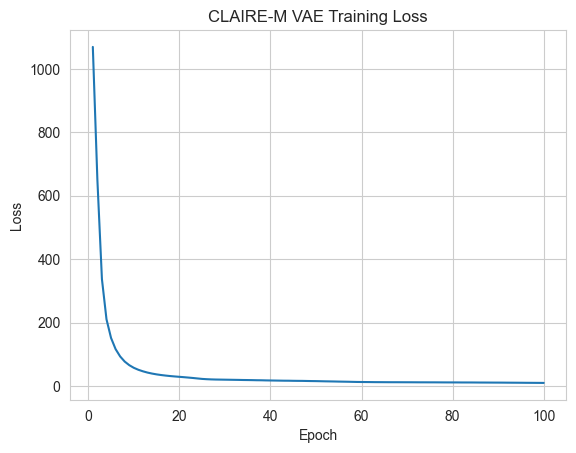

In [16]:
sns.set_style('whitegrid')
plt.plot(range(1, len(vae_train_loss) + 1), vae_train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CLAIRE-M VAE Training Loss")
plt.show()

Save:

In [17]:
os.makedirs("../models/adult", exist_ok=True)

In [18]:
torch.save(vae.state_dict(), "../models/adult/claire_cf_vae.pth")

## Generate Counterfactuals

In [19]:
from src.generate_counterfactuals import claire_vae

In [20]:
cf_df = claire_vae(vae, train_dataset, sensitive_groups=[0, 1], num_samples=500)

In [21]:
len(train_df), len(cf_df)  # 1 counterfactuals per sample

(14652, 14652)

In [22]:
cf_df.head()

,education_num,age,sex,income,loan_approved
0,9.885834,37.001122,0,0.0,1.0
1,9.130336,67.764877,0,0.0,0.0
2,9.952430,34.207584,0,1.0,0.0
3,8.880475,21.112825,0,0.0,0.0
4,9.723570,21.186659,0,0.0,1.0


In [23]:
cf_df["age"] = cf_df["age"].round().astype(int)
cf_df["education_num"] = cf_df["education_num"].round().astype(int)

In [24]:
cf_df["income"] = cf_df["income"].astype(int)
cf_df["loan_approved"] = cf_df["loan_approved"].astype(int)

In [25]:
cf_df.head()

,education_num,age,sex,income,loan_approved
0,10,37,0,0,1
1,9,68,0,0,0
2,10,34,0,1,0
3,9,21,0,0,0
4,10,21,0,0,1


In [26]:
cf_df.to_csv("../data/adult/train_betahats_cf_claire.csv", index=False)

We are preserving the original outcome, so this is expected to be the same:

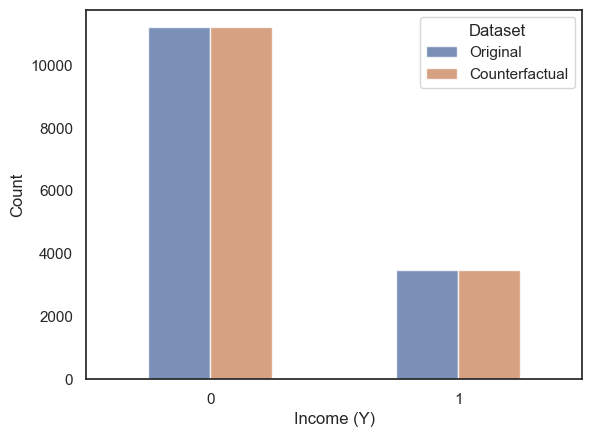

In [27]:
income_counts_orig = train_df.income.value_counts().reset_index()
income_counts_orig["Dataset"] = "Original"
income_counts_cf = cf_df.income.value_counts().reset_index()
income_counts_cf["Dataset"] = "Counterfactual"
income_counts = pd.concat([income_counts_orig, income_counts_cf], ignore_index=True)
income_counts["income"] = income_counts["income"].astype(int)

sns.set(font_scale=1) 
sns.set_style("white")
sns.barplot(data=income_counts, x="income", y="count", hue="Dataset", width=0.5, alpha=0.8)
plt.xlabel("Income (Y)")
plt.ylabel("Count")
plt.show()

Distribution of the original and reconstructed features:

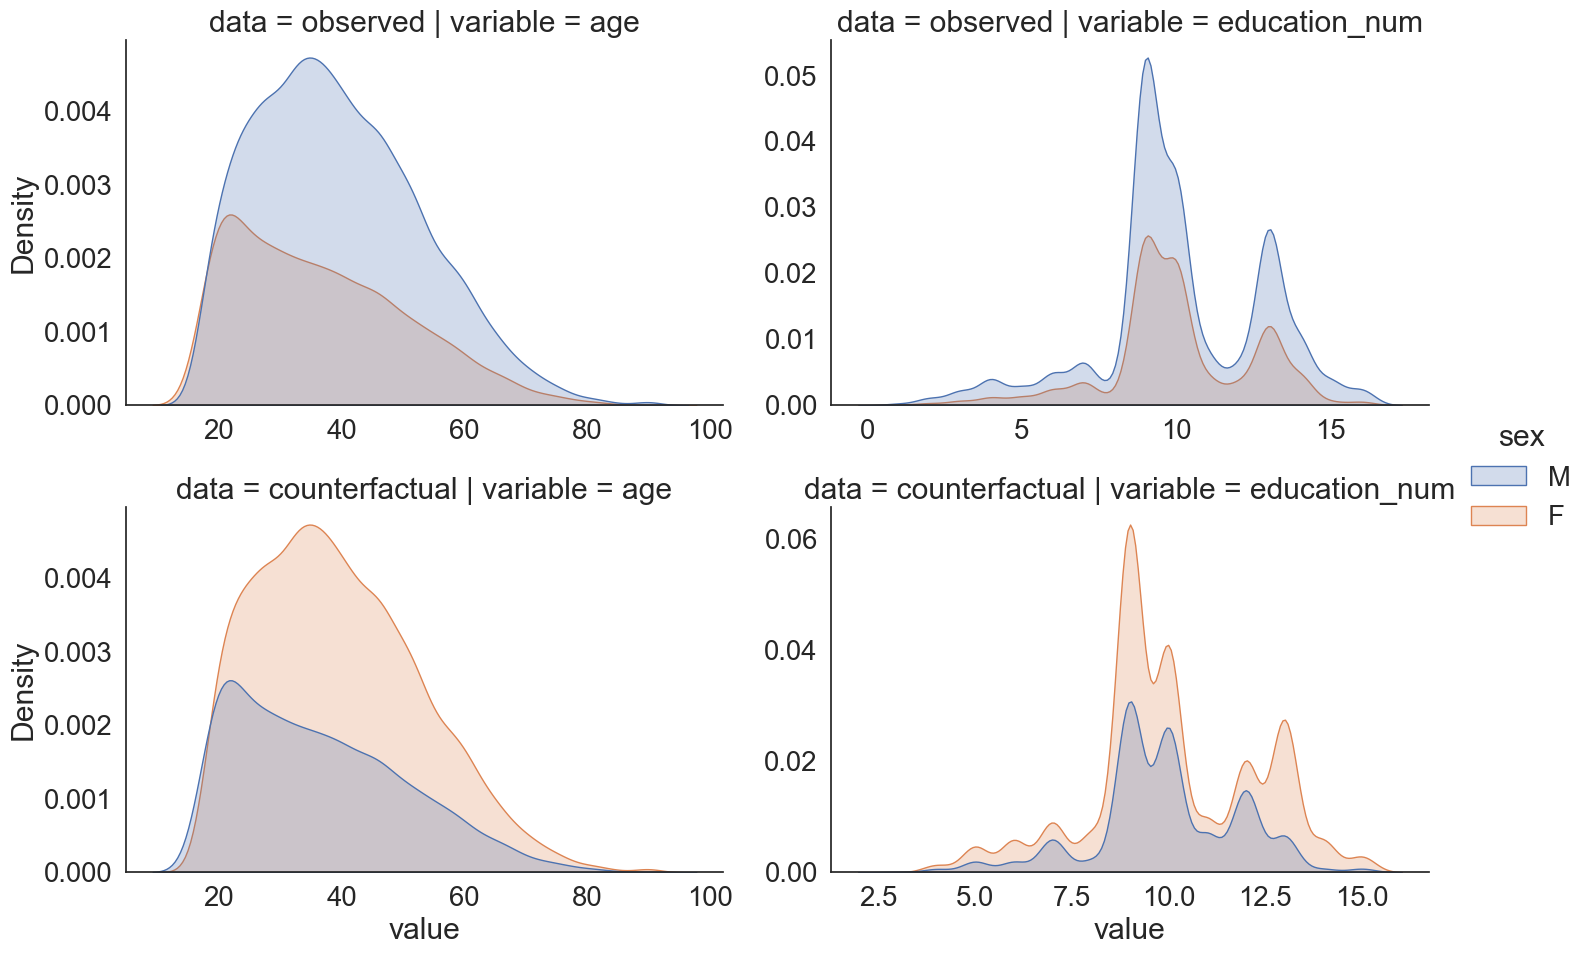

In [28]:
W_names = ["age", "education_num", "sex"]

orig_df_long = train_df[W_names].melt(id_vars=["sex"], var_name="variable", value_name="value")
cf_df_long = cf_df[W_names].melt(id_vars=["sex"], var_name="variable", value_name="value")

orig_df_long["data"] = "observed"
cf_df_long["data"] = "counterfactual"

data_long = pd.concat([orig_df_long, cf_df_long], ignore_index=True)

data_long["sex"] = data_long["sex"].astype(int).map(lambda x: "F" if x == 1 else "M")

sns.set(font_scale=1.8) 
sns.set_style("white")
g = sns.displot(data_long, x="value", col="variable", row="data", hue="sex", kind="kde", fill=True,
                facet_kws=dict(sharey=False, sharex=False), height=5, aspect=1.5)

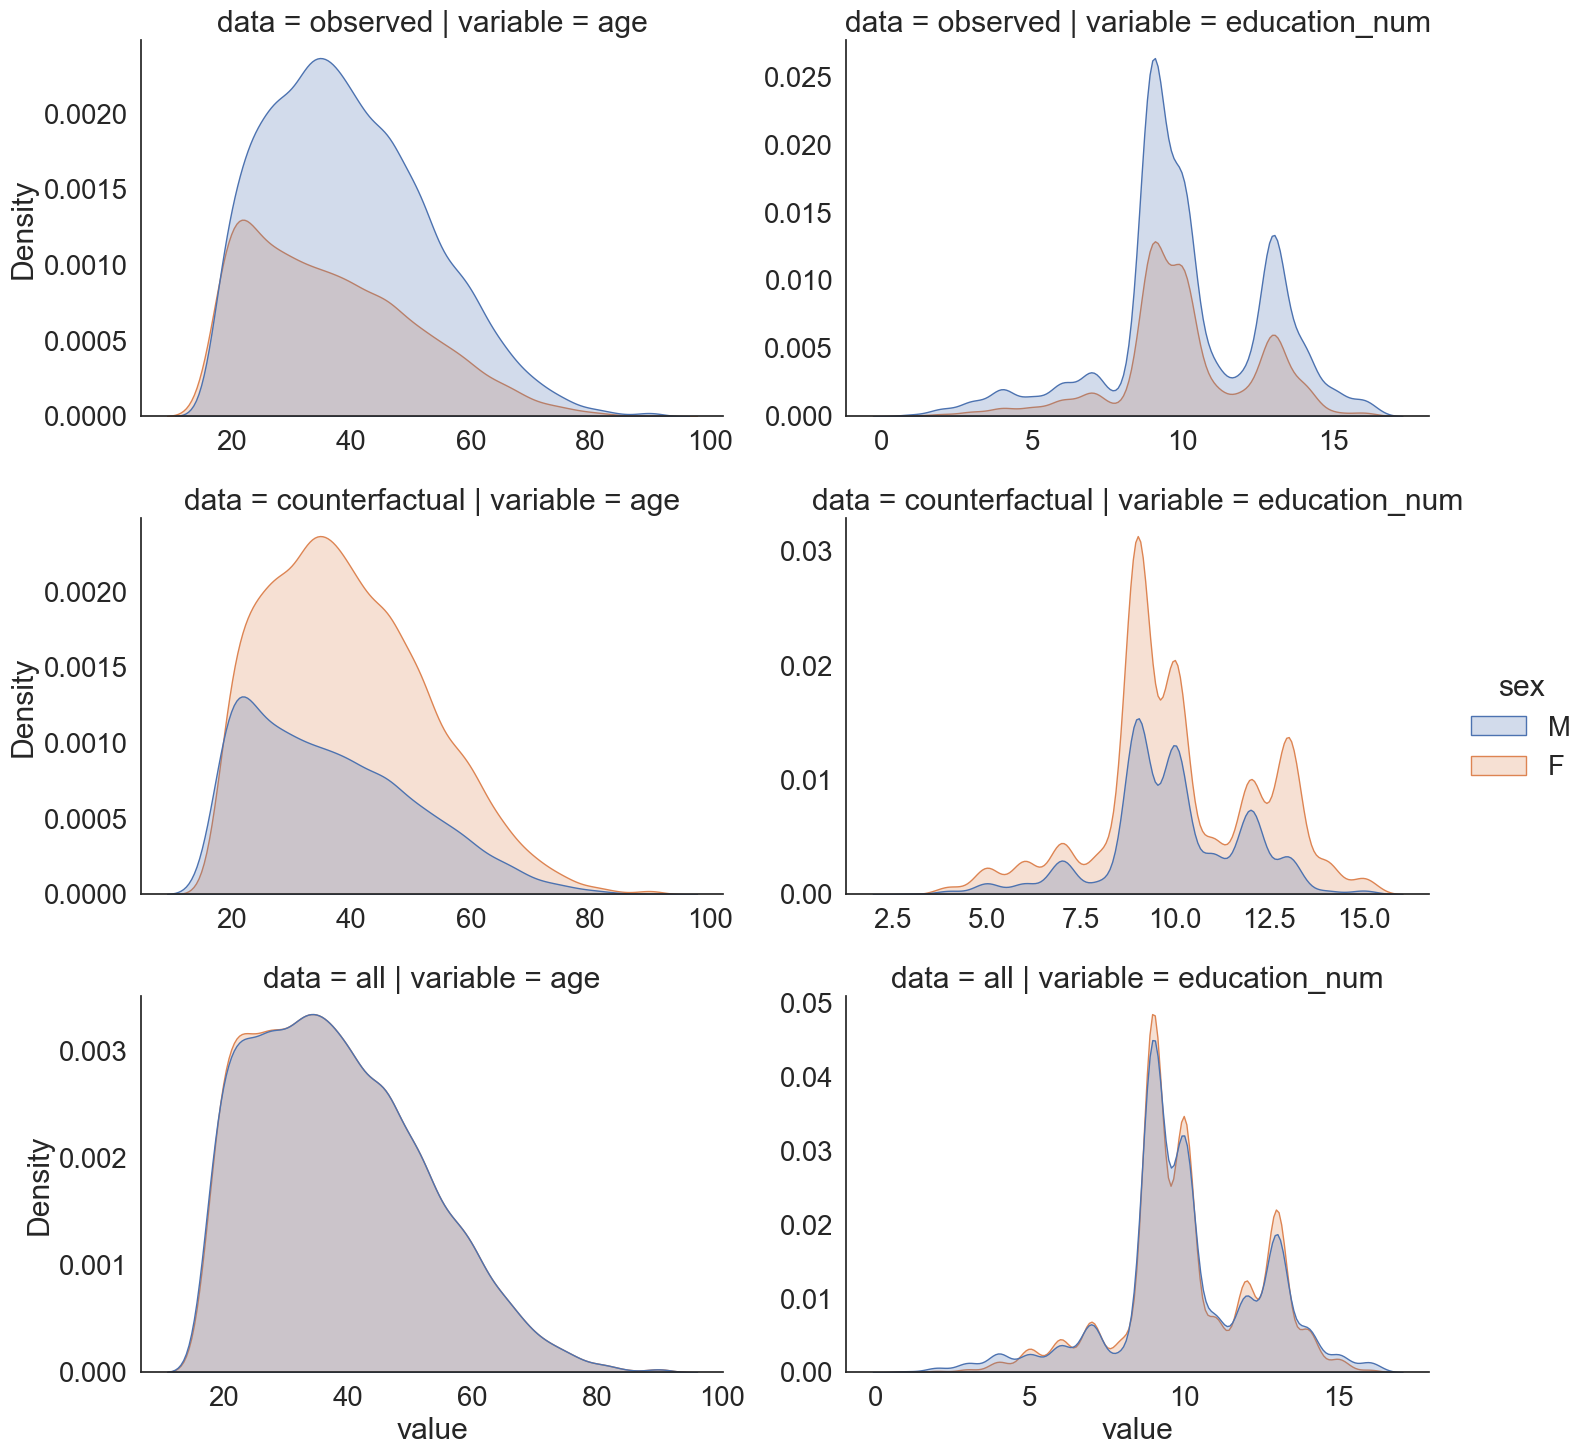

In [29]:
W_names = ["age", "education_num", "sex"]

all_df = pd.concat([train_df, cf_df], ignore_index=True)

orig_df_long = train_df[W_names].melt(id_vars=["sex"], var_name="variable", value_name="value")
cf_df_long = cf_df[W_names].melt(id_vars=["sex"], var_name="variable", value_name="value")
all_df_long = all_df[W_names].melt(id_vars=["sex"], var_name="variable", value_name="value")

orig_df_long["data"] = "observed"
cf_df_long["data"] = "counterfactual"
all_df_long["data"] = "all"

data_long = pd.concat([orig_df_long, cf_df_long, all_df_long], ignore_index=True)

data_long["sex"] = data_long["sex"].astype(int).map(lambda x: "F" if x == 1 else "M")

sns.set(font_scale=1.8) 
sns.set_style("white")
g = sns.displot(data_long, x="value", col="variable", row="data", hue="sex", kind="kde", fill=True,
                facet_kws=dict(sharey=False, sharex=False), height=5, aspect=1.5)